# Assignment-5

### Upgrades:
  - Image normalization
  - L2 regularization
  - ReLU after BN
  - Training - 40 epochs with saving best model
  - Added misclassified images

---


### Install Dependencies 

- To train the following network, we use a framework named Keras.
- Keras provides functions for Convolution layers, Activation layers, MaxPooling layer, etc. so we don't need write code for designing such layers. Instead we can focus on creating better network architecture
- Following lines of code installs Keras on the system

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Libraries and Modules

In [0]:
# Import Numpy for matrices and multi-dimensional array's processing
import numpy as np

# Import Sequential to write model layer-by-layer in sequence 
from keras.models import Sequential

# Import Flatten layer to flatten feature-map, Dropout to avoid overfitting
from keras.layers import Flatten, Dropout, Activation, BatchNormalization

# Import Convolution layer to perform convolution on the channels, MaxPooling to reduce dimensions of channel
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils for one-hot-encoding
from keras.utils import np_utils

# Import hand written dataset of numbers from 0-9
from keras.datasets import mnist

# Import Regularizer
from keras import regularizers

# Import DataGenerator for Image Normalization
from keras.preprocessing.image import ImageDataGenerator

### Load the Data
The data is loaded in following variables:

- X_train: Samples used during training the network
- y_train: Corresponding labels for training data
- X_test: Samples used for validation after training the network
- y_test: Corresponding labels for the validation of network's performance

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Dataset Information and Display Data Sample
- We have 60000 images in training dataset
- We have 10000 images in the testing dataset
- Each image's dimension are 28x28x1

(60000, 28, 28)
(10000, 28, 28)


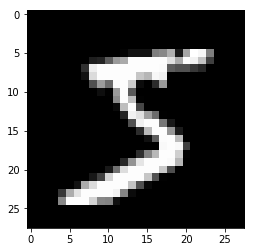

In [4]:
# Dimensions of the training dataset images
print (X_train.shape)

# Dimensions of the testing dataset images
print (X_test.shape)

# Import python module for plotting the image
from matplotlib import pyplot as plt

# Below line is written to display an image in this notebook
%matplotlib inline

# Plotting first image in the training dataset
# cmap='gray' displays the data sample in appropriate color space
plt.imshow(X_train[0], cmap='gray')

### Reshape the dataset
- Keras requires the input data in a form of 4D tensor
- The first value represents the total number of images in a training/testing dataset
- Second and third values are dimensions of an image
- Fourth value is the number of channels (1 for grayscale and 3 for RGB)  

Thus, the X_train will have a shape of (60000, 28, 28, 1)  
and the X_test will have a shape of (1000, 28, 28, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Pixel Normalizing
- When a Kernel is convolved over an input image, the maximum pixel value in the feature-map depends upon the maximum pixel value in the kernel
- Different kernels will have different maximum values and so their corresponding feature-maps will have different maximum values
- The feature-map with greater maximum pixel value will be louder while training the network
- To avoid biased activations of such kernels, we perform Normalization
- For normalization, we first convert the data into float so that we can get all the decimal values
- By dividing all the pixels by 255, all the pixel values will be restricted between 0.0 to 1.0. This is how we perform pixel normalization.

In [0]:
# Convert data to float so that it can hold values between 0.0 to 1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Pixel Normalizing 
X_train /= 255
X_test /= 255

### Image Normalization
- Because of convolution, some pixels are getting covered a lot more times compared to other pixels. This creates a peak of information at the center of the image and elsewhere it is distributed.
- Such uneven distribution of information makes it more difficult for the model to learn. Hence, we perform image normalization
- Also, images with differet lighting conditions perform better after normalization
![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-5/normalization.jpg?raw=true)
- A 8 bit integer image will have all the pixel values in range 0 to 255
- The minimum pixel value in an image need not be zero
- Likewise, the maximum pixel value need not be 255
- In image normalization, we stretch the minimum pixel value to 0 and maximum pixel value to 255

![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-5/prep.jpeg?raw=true)
We can achieve normalization by following steps
- Zero-centering
- Normalizing


In Batch Normalization,
  - We calculate mean ($\mu$) and standard deviation ($\sigma$) for each channel of the layer
  - Consider x as a channel, we calculate new channel using $\bar{x} = \frac {x-\mu}{\sigma}$
  - Later, we linearize this using $y = \gamma \bar{x} + \beta$
  - For nomralized data, $\beta = 0$ and $\gamma = 1$ 
  - $\gamma$ is related to scale while $\beta$ is related to shift
  - Batch Normalization improves the model performance. Following is the graph of training with and without BN
  ![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-5/perf.png?raw=true)
  
---

Note: If model is not perfomring well on one-particular class then we can take images of that class and perform image normalization to improve the accuracy of the model.

In [7]:
trainX = X_train
trainy = y_train
testX = X_test
testY = y_test

# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=0.131 (0.308), test=0.133 (0.310)
Data Generator mean=0.131, std=0.308
(64, 28, 28, 1) -0.011463113 0.9870029
(60000, 28, 28, 1) -4.9324944e-07 0.9999959


### Print Labels

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One-Hot Encoding
- It is way of representing labels
- Instead of using one-single scalar for labels, we use a vector to represent the labels.
- The position of the ground-truth is marked as 1 while other positions are marked as 0
- The network cannot print out the prediction as 0,1,2,....9
- Instead it can activate the neuron associated with these numbers. So, the last layer before activation layer has number of neurons equal to number of classes (in this case 10)
- The neuron associated with the number is set as 1 while other neurons are set as 0. Following is the pattern in which encoding is done:  
  - Number 0 is encoded as 1000000000  
  - Number 1 is encoded as 0100000000  
  - Number 2 is encoded as 0010000000  
   .  
   .  
   .  
   .  
  - Number 9 is encoded as 0000000001

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Print Labels after one-hot encoding

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Architecture

- Model is defined sequential
- The model has convolution, maxpooling, flatten, BatchNormalization and softmax layers

- **Convolution Layer:**
  - It is a process of extracting features from a channel using a kernel (feature extractor)
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/5-3ConvolutionSmall.gif?raw=true)

- **MaxPooling Layer:**
  - It reduces the dimension of an channel. If we use MaxPooling of 2x2, dimension of an channel will become half of input channel
  - It only passes the louder pixel value in the next layer
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%203/Files/maxpool.gif?raw=true)

- **Softmax Layer:**
  - It is like probability
  - It gives score of a class between 0 and 1
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/softmax.png?raw=true)

- **Flatten Layer:**
  - It flattens the input dimension
  - Multiple 2D channels are converted into a vector 
  
  
- [Regularization](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/)
  - We use L1 and L2 regularization to avoid overfitting
  - In ML, regularization penalizes the coefficients
  - In DL, it penalized weight matrices
  - It updates the general cost function by adding regularization term  
  `Cost function = Loss + Regularizer`
  - To avoid overfitting, we need simpler models
  - Neural networks with smaller weights leads to simpler models. Hence, regularization is used to reduce the weights
  - We use L1 and L2 regularizer.
  - L1 has absolute term while L2 has square term. Hence, L1 may reduce the weight value to zero while L2 will reduce nearby zero but not exactly zero
  ![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-5/reg.JPG?raw=true)
  - Following are the formulas for L1 and L2
   - L1  
      ![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-5/l1.png?raw=true)
   - L2  
      ![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-5/l2.png?raw=true)  
  - Code implementation of L2 regularization
    ```
    model.add(Convolution2D(10, 3, kernel_regularizer=regularizers.l2(decay_rate)))
    ```

In [11]:
# For reproducable results
np.random.seed(7)

drop = 0.2
alpha = 0.0007

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1), name='conv_1', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(BatchNormalization())                                                                                                       # Layer 2: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 3: ReLU Activation
model.add(Convolution2D(10, 3, 3, name='conv_2', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                          # Layer 4: Input:26x26x10  |  Kernels:(3x3x10)x10  |  Output:24x24x10  |  Receptive Field:5x5  
model.add(BatchNormalization())                                                                                                       # Layer 5: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 6: ReLU Activation
model.add(Convolution2D(12, 3, 3, name='conv_3', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                          # Layer 7: Input:24x24x64  |  Kernels:(3x3x10)x12  |  Output:22x22x12  |  Receptive Field:7x7
model.add(BatchNormalization())                                                                                                       # Layer 8: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 9: ReLU Activation

# Transition Block
model.add(Convolution2D(10, 1, 1, name='conv_4_1x1', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                      # Layer 10: Input:22x22x12  |  Kernels:(1x1x12)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                                                                 # Layer 11: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 
model.add(BatchNormalization())                                                                                                       # Layer 12: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 13: ReLU Activation
model.add(Dropout(drop))                                                                                                              # Layer 14: Dropout Layer

# Convolution Block
model.add(Convolution2D(10, 3, 3, name='conv_5', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                          # Layer 15: Input:11x11x10  |  Kernels:(3x3x10)x10  |  Output:9x9x10  |  Receptive Field:16x16 
model.add(BatchNormalization())                                                                                                       # Layer 16: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 17: ReLU Activation
model.add(Convolution2D(10, 3, 3, name='conv_6', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                          # Layer 18: Input:09x09x10  |  Kernels:(3x3x10)x10  |  Output:7x7x10  |  Receptive Field:18x18 
model.add(BatchNormalization())                                                                                                       # Layer 19: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 20: ReLU Activation
model.add(Convolution2D(12, 3, 3, name='conv_7', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                          # Layer 21: Input:07x07x10  |  Kernels:(3x3x10)x12  |  Output:5x5x12  |  Receptive Field:20x20 
model.add(BatchNormalization())                                                                                                       # Layer 22: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 23: ReLU Activation

# Transition Block
model.add(Convolution2D(10, 1, 1, name='conv_8_1x1', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                      # Layer 24: Input:5x5x12    |  Kernels:(1x1x12)x10  |  Output:5x5x10  |  Receptive Field:22x22
model.add(BatchNormalization())                                                                                                       # Layer 25: Batch Normalization
model.add(Activation('relu'))                                                                                                         # Layer 26: ReLU Activation
model.add(Dropout(drop))                                                                                                              # Layer 27: Dropout Layer

# Output Block
model.add(Convolution2D(10, 5, name='conv_9', use_bias=False, kernel_regularizer=regularizers.l2(alpha)))                             # Layer 28: Input:5x5x10   |  Kernels:(5x5x10)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                                                                  # Layer 29: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                                                                      # Layer 30: Activation Layer

# Summaries above architecture
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., name="conv_1", use_bias=False, kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), name="conv_2", use_bias=False, kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), name="conv_3", use_bias=False, kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), name="conv_4_1x1", use_bias=False, kernel_regularizer=<keras.reg...)`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), name="conv_5", use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), name="conv_6", use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), name="conv_7", use_bias=False, kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        900       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 10)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 12)        1080      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), name="conv_8_1x1", use_bias=False, kernel_regularizer=<keras.reg...)`


### Compile the Model

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

### Mount the Drive
Google Drive needs to be mounted before accessing space for storing models or loading models.

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### ModelCheckpoint to save best model on Colab

In [0]:
from keras.callbacks import ModelCheckpoint

# Link to store models
filepath="/content/gdrive/My Drive/Colab Notebooks/Training/model-{epoch:02d}-{val_acc:.2f}.hdf5"

# Configuration of Modelcheckpoint to save only best models
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

### Model Training

In [15]:
model.fit(X_train, Y_train, batch_size=64, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 275us/step - loss: 0.3039 - acc: 0.9244 - val_loss: 0.1253 - val_acc: 0.9807

Epoch 00001: val_acc improved from -inf to 0.98070, saving model to /content/gdrive/My Drive/Colab Notebooks/Training/model-01-0.98.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 188us/step - loss: 0.1337 - acc: 0.9767 - val_loss: 0.0982 - val_acc: 0.9873

Epoch 00002: val_acc improved from 0.98070 to 0.98730, saving model to /content/gdrive/My Drive/Colab Notebooks/Training/model-02-0.99.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 188us/step - loss: 0.1140 - acc: 0.9800 - val_loss: 0.0983 - val_

**Max Validation Accuracy: 99.49% (25th epoch)**

### Load Model from Colab

In [0]:
# from keras.models import load_model
# model = load_model('/content/gdrive/My Drive/Colab Notebooks/Training/model-21-0.99.hdf5')

### Predictions for testing datasets

In [0]:
# One hot encoded predictions for testing dataset
y_pred = model.predict(X_test)

### Round off values from prediction vector

In [18]:
# Rounding off values for one-hot vector
y_pred = np.round(y_pred[:])

print(y_pred[:])
print(y_test[:])

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 1 ... 4 5 6]


### Decoding
Earlier we have done one-hot encoding for training the model. Now, we will decode these vectors back to the whole numbers 

In [0]:
# Function for decoding one-hot vector
def decode(datum):
    return np.argmax(datum)

In [0]:
# List to store whole numbers/decoded numbers
decoded_labels = []

for i in range(len(y_pred)):
    datum = y_pred[i]
    decoded_datum = decode(y_pred[i])
    decoded_labels.append(decoded_datum)
#     print('decoded datum: %s' % decoded_datum)

# print(decoded_labels)
# print(decoded_labels[-1])

### Checking incorrect predictions
After decoding, we have 2 lists:
- Decoded predictions labels
- True labels for testing dataset

Comparing these 2 lists, we can identify which images are predicted incorrectly.   
`incorrect_pred` holds misclassified image index in the dataset.

Total misclassified images in test dataset are **64** and their indexes are printed below.  
64 misclassified images out of 10,000 verifies the validation accuracy of model is around 99.36%   


The prediction by model for these images and their actual labels are also printed below

In [21]:
# We have two lists
# 1.decoded_labels
# 2.y_test

# Checking whether decoded list and labels are of same size
assert len(decoded_labels) == len(y_test),"Data mismatched"

# List to store misclassified images' index
incorrect_pred = []

# For every single index, if predicted label is not equal to testing data label then it is misclassified label
for i in range(len(y_test)):
  if y_test[i] == decoded_labels[i]:
    pass
  else:
    incorrect_pred.append(i)
    
print("Incorrect Prediction Indexes: ", incorrect_pred)
print("Total incorrect predictions: ", len(incorrect_pred))

# Verification
for val in incorrect_pred:
  print("Prediction: ", decoded_labels[val], "\t","Actual Label: ", y_test[val])

Incorrect Prediction Indexes:  [211, 321, 445, 582, 726, 740, 947, 1014, 1039, 1114, 1182, 1232, 1299, 1337, 1393, 1414, 1530, 1737, 1878, 1901, 2018, 2035, 2118, 2130, 2225, 2293, 2462, 2488, 2597, 2654, 2742, 2771, 3030, 3060, 3422, 3558, 3762, 3767, 3806, 3808, 4176, 4201, 4248, 4547, 4740, 4823, 4838, 4860, 4880, 5752, 5937, 6576, 6597, 6625, 6651, 6847, 8061, 8316, 8408, 8527, 9664, 9672, 9679, 9729]
Total incorrect predictions:  64
Prediction:  9 	 Actual Label:  5
Prediction:  7 	 Actual Label:  2
Prediction:  0 	 Actual Label:  6
Prediction:  0 	 Actual Label:  8
Prediction:  0 	 Actual Label:  7
Prediction:  0 	 Actual Label:  4
Prediction:  9 	 Actual Label:  8
Prediction:  0 	 Actual Label:  6
Prediction:  1 	 Actual Label:  7
Prediction:  0 	 Actual Label:  3
Prediction:  0 	 Actual Label:  6
Prediction:  4 	 Actual Label:  9
Prediction:  7 	 Actual Label:  5
Prediction:  6 	 Actual Label:  2
Prediction:  3 	 Actual Label:  5
Prediction:  7 	 Actual Label:  9
Prediction:  7

### Converting Datatype 
- Earlier the images were converted to `float` for ease of training
- Now, since we want to display images back, we have to convert it back to `uint`datatype
- The pixel values are limited in domain of 0 to 255 by using `np.clip`

In [22]:
# Multiplying each pixel by 255
X_test *= 255

# Restricting pixel values from 0 to 255
X_test = np.clip(X_test, 0, 255)

# Changing datatype of images to integer from float
X_test = X_test.astype('uint8')

print(X_test.shape)

(10000, 28, 28, 1)


### Display the misclassified image
- Following is the first miclassified image by the model.
- The index of this image is `321` in the testing dataset
- Trained model predicted it as `7` but the actual label for this image is `2`
- This shows how good the model is performing. Even humans can misclassify this image as 7 

Prediction:  7 	 Actual Label:  2


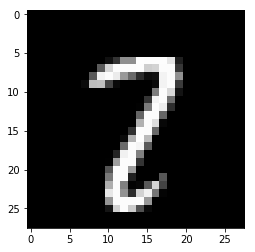

In [23]:
# Taking first misclassified sample from testing dataset
img = X_test[321]

# Reshaping the sample in image format
img = img.reshape((28,28))

# Printing Model Prediction and Actual Label
print("Prediction: ", decoded_labels[321], "\t","Actual Label: ", y_test[321])

# Displaying the sample
plt.imshow(img, cmap='gray')
plt.show()

### Displaying all 74 misclassified Images:
- Below are the 74 misclassified images from the testing dataset of 10,000 images
- For every single image, its moodel prediction and actual label is shown
- This helps us to appreciate the performance of the model
- Following images can be used to decided the augmentation policies to improve performance of the model.

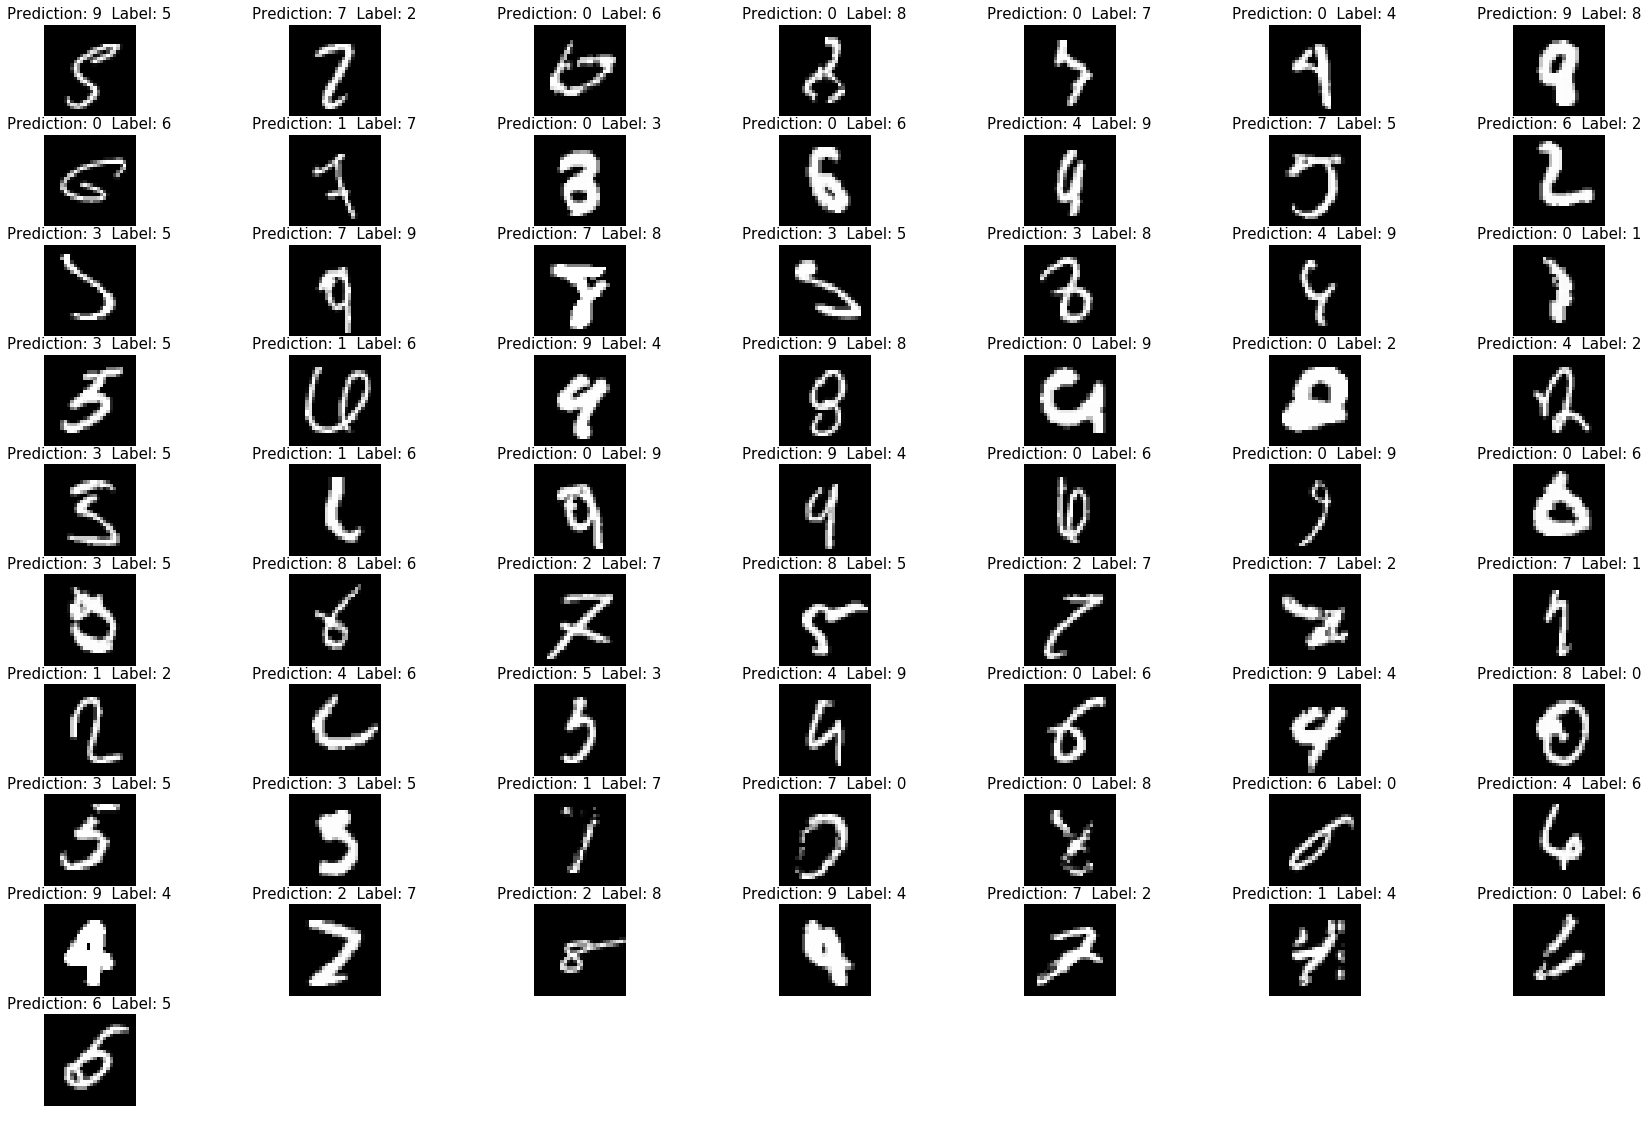

In [24]:
w=10
h=10
fig=plt.figure(figsize=(30, 30))
columns = 7
rows = 15
val = 0

for i in range(1, columns*rows +1):
  if len(incorrect_pred) >= i:
    img = X_test[incorrect_pred[val]]
    img = img.reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.title('Prediction: '+ str(decoded_labels[incorrect_pred[val]]) + "  Label: " + str(y_test[incorrect_pred[val]]), fontsize=15)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    val += 1
  else:
    pass
plt.show()